In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
np.random.seed(42)

In [2]:
with fits.open('solarFLAGhh2_1.fits') as df:
    t_all = np.linspace(0, df[0].header['CADENCE']*df[0].header['NAXIS1'], num=df[0].header['NAXIS1'])
    rv_all = df[0].data

Get a random night of simulated data:

In [3]:
ind = np.random.randint(len(t_all))
t = t_all[ind:ind+1000]/3600/24. # convert to days
rv = rv_all[ind:ind+1000]

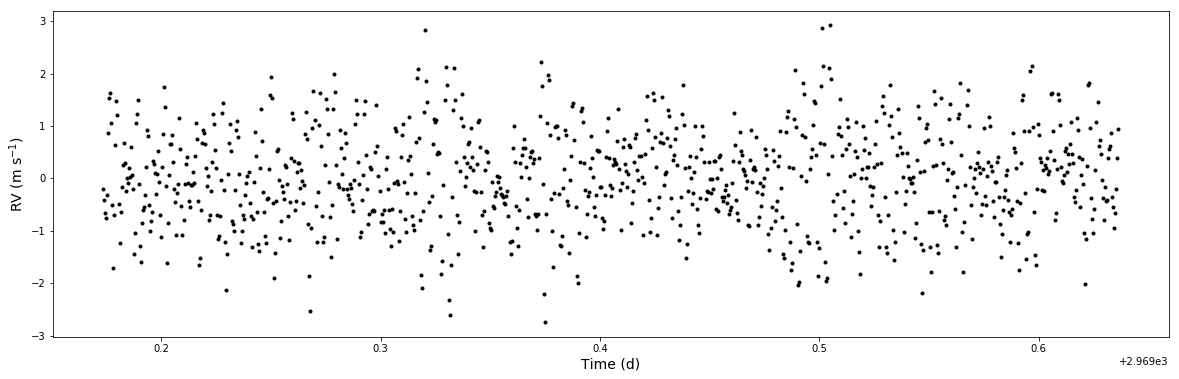

In [4]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(t,rv,'k.')
ax.set_ylabel(r'RV (m s$^{-1}$)', fontsize=14)
ax.set_xlabel('Time (d)', fontsize=14);

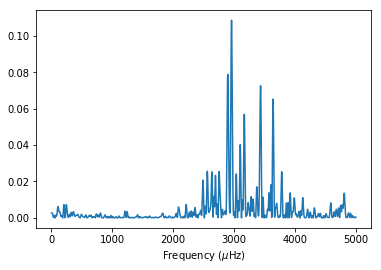

In [5]:
from astropy.stats import LombScargle
frequency = np.linspace(1e-6, 5000e-6, 5000) # frequencies in Hz
power = LombScargle(t * 24 * 3600, rv).power(frequency) # time axis is converted to seconds
plt.plot(frequency*1e6, power)
plt.xlabel(r'Frequency ($\mu$Hz)');

Looks like nu_max corresponds to around 3000 microHz which corresponds to 50 minutes??

In [6]:
def bin_by_interval(xs, ys, interval):
    start_xs = np.arange(np.min(xs), np.max(xs), interval) # starting values of bins
    binned_xs, binned_ys = [], []
    for s in start_xs:
        e = s + interval
        inds = (xs >= s) & (xs < e)
        if np.sum(inds) > 0:
            binned_xs.append(np.mean(xs[inds]))
            binned_ys.append(np.mean(ys[inds]))
    return np.asarray(binned_xs), np.asarray(binned_ys)

In [7]:
intervals = np.logspace(1.6,4.5,8000) # binning scale in seconds
rms = [np.std(bin_by_interval(t,rv,i/3600/24.)[1]) for i in intervals]

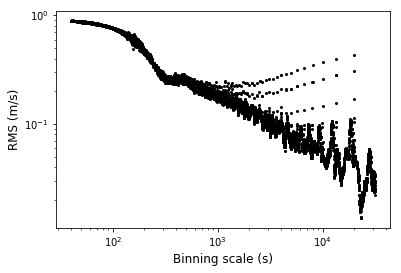

In [11]:
plt.loglog(intervals, rms, 'k.', ms=4)
#plt.axvline(3.e3) # ~1/nu-max (based on eyeballing)
plt.xlabel('Binning scale (s)', fontsize=12)
plt.ylabel('RMS (m/s)', fontsize=12);

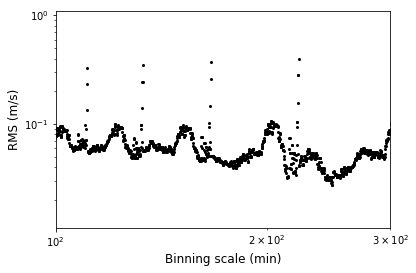

In [21]:
plt.loglog(intervals/60, rms, 'k.', ms=4)
#plt.axvline(3.e3) # ~1/nu-max (based on eyeballing)
plt.xlabel('Binning scale (min)', fontsize=12)
plt.ylabel('RMS (m/s)', fontsize=12)
plt.xlim([1e2,3e2]);

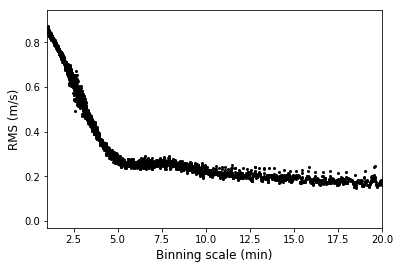

In [15]:
plt.plot(intervals/60, rms, 'k.', ms=4)
plt.xlabel('Binning scale (min)', fontsize=12)
plt.ylabel('RMS (m/s)', fontsize=12)
plt.xlim([1,20]);